# Credit Card Fraud Detection 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## importing libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Data preparation and Data preprocessing 

## importing dataset 

In [3]:
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining Project/creditcard.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [4]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Checking for missing values 

In [ ]:
dataset.info()# no missing values in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Visualising Data 

Text(0.5, 1.0, 'Bar Chart for Credit Card Fraud Detection')

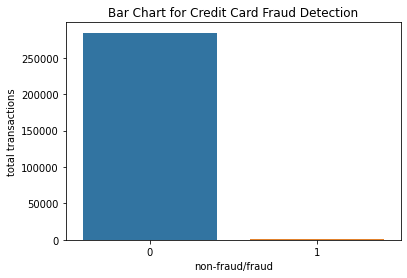

In [ ]:
sb.countplot(x='Class',data=dataset)
plt.xlabel('non-fraud/fraud')
plt.ylabel('total transactions')
plt.title('Bar Chart for Credit Card Fraud Detection')

### pie chart 

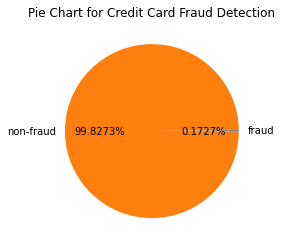

In [ ]:
zeroes=dataset.Class[dataset.Class==0].count()
ones=dataset.Class[dataset.Class==1].count()
data={'class':['fraud','non-fraud'],'values':[ones,zeroes]}
plt.pie(x='values',labels='class',data=data,autopct='%1.4f%%')
plt.title('Pie Chart for Credit Card Fraud Detection')
plt.show()

###  Correlation plot

Text(0.5, 1.0, 'Correlation Heatmap')

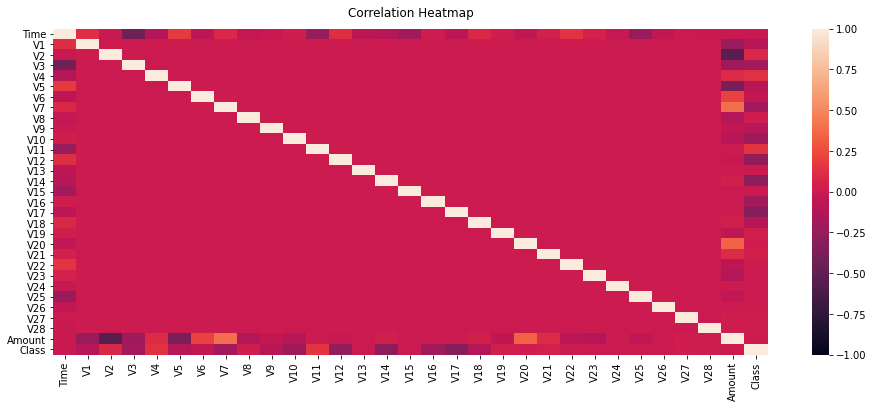

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sb.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=False)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

## Splitting dataset into training and test set (using stratified sampling)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)

## Feature Scaling 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Applying PCA 

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=27)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [ ]:
pca.explained_variance_ratio_

array([0.0655522 , 0.05618448, 0.03505083, 0.0342737 , 0.03394316,
       0.03382107, 0.03374148, 0.03359195, 0.03355511, 0.03349907,
       0.03347838, 0.03344895, 0.03342787, 0.03338954, 0.03334999,
       0.03332909, 0.03331382, 0.03327033, 0.03324598, 0.03322544,
       0.03321113, 0.03315708, 0.03309941, 0.03307895, 0.03299148,
       0.03292503, 0.03285106])

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.0655522 , 0.12173668, 0.15678751, 0.1910612 , 0.22500437,
       0.25882544, 0.29256692, 0.32615887, 0.35971397, 0.39321304,
       0.42669142, 0.46014037, 0.49356824, 0.52695778, 0.56030777,
       0.59363685, 0.62695067, 0.66022101, 0.69346699, 0.72669242,
       0.75990356, 0.79306064, 0.82616005, 0.859239  , 0.89223047,
       0.92515551, 0.95800657])

# Training Model on training dataset 

## Random forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier=RandomForestClassifier(n_estimators=10,criterion='entropy')
random_forest_classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### confusion matrix (random forest) 

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred=random_forest_classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
random_forest=accuracy_score(y_test,y_pred)

[[56862     2]
 [   33    65]]


## Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression_classifier=LogisticRegression()
logistic_regression_classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### confusion matrix(logistic regression)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred=logistic_regression_classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
logistic_regression=accuracy_score(y_test,y_pred)

[[56854    10]
 [   37    61]]


## Naive Bayes Classifier 

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_classifier=GaussianNB()
naive_bayes_classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### confusion matrix(Naive Bayes) 

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred=naive_bayes_classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
Naive_bayes=accuracy_score(y_test,y_pred)

[[55666  1198]
 [   18    80]]


## K-Nearest Neighbour 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier=KNeighborsClassifier()
KNN_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### confusion matrix(KNN)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred=KNN_classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
KNN=accuracy_score(y_test,y_pred)

[[56860     4]
 [   28    70]]


## Support Vector Classifier 

In [ ]:
from sklearn.svm import SVC
svc_classifier=SVC(kernel='rbf',random_state=0)
svc_classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

### confusion matrix(SVC)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred=svc_classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
support_vector_classifier=accuracy_score(y_test,y_pred)

[[56862     2]
 [   36    62]]


# Accuracy Table 

In [ ]:
data={'Models':['Random Forest','Logistic Regression','Naive Bayes','KNN','Support Vector Classifier'],'Accuracy':[random_forest,logistic_regression,Naive_bayes,KNN,support_vector_classifier]}
accuracies=pd.DataFrame(data,index=[1,2,3,4,5])
accuracies

,Models,Accuracy
1,Random Forest,0.999386
2,Logistic Regression,0.999175
3,Naive Bayes,0.978652
4,KNN,0.999438
5,Support Vector Classifier,0.999333
